In [1558]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [1559]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1560]:
df.drop(columns = ['id','date'],inplace = True)


In [1561]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1562]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1563]:
df.drop_duplicates(inplace = True)

In [1564]:
df.duplicated().sum()

0

In [1565]:
df.shape

(21608, 19)

In [1566]:
df.corr()['price']

price            1.000000
bedrooms         0.308326
bathrooms        0.525146
sqft_living      0.702035
sqft_lot         0.089652
floors           0.256893
waterfront       0.266371
view             0.397409
condition        0.036345
grade            0.667541
sqft_above       0.605559
sqft_basement    0.323839
yr_built         0.054062
yr_renovated     0.126489
zipcode         -0.053179
lat              0.307002
long             0.021587
sqft_living15    0.585378
sqft_lot15       0.082435
Name: price, dtype: float64

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308326,0.525146,0.702035,0.089652,0.256893,0.266371,0.397409,0.036345,0.667541,0.605559,0.323839,0.054062,0.126489,-0.053179,0.307002,0.021587,0.585378,0.082435
bedrooms,0.308326,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571,0.029197
bathrooms,0.525146,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692,0.087192
sqft_living,0.702035,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.089652,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552
floors,0.256893,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180
waterfront,0.266371,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698
view,0.397409,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566
condition,0.036345,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.667541,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396,0.119319


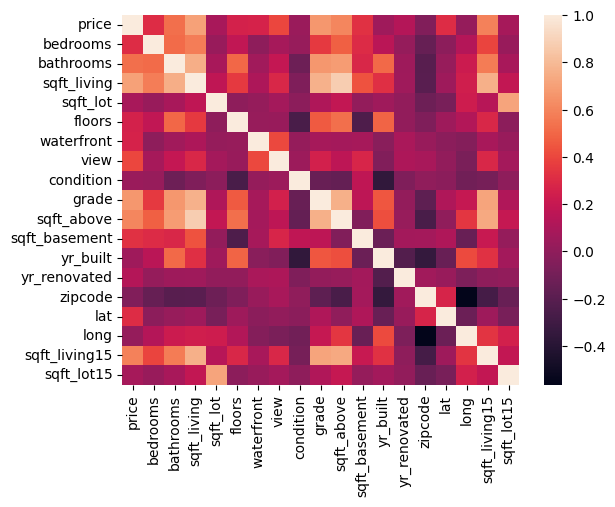

In [1567]:
import seaborn as sns
sns.heatmap(df.corr())
df.corr()

In [1568]:
df.drop(columns = ['waterfront','floors','yr_renovated','sqft_lot','condition','yr_built','zipcode','long','sqft_lot15','sqft_above'],inplace = True)

In [1569]:
df.corr()['price']

price            1.000000
bedrooms         0.308326
bathrooms        0.525146
sqft_living      0.702035
view             0.397409
grade            0.667541
sqft_basement    0.323839
lat              0.307002
sqft_living15    0.585378
Name: price, dtype: float64

In [1570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  float64
 1   bedrooms       21608 non-null  int64  
 2   bathrooms      21608 non-null  float64
 3   sqft_living    21608 non-null  int64  
 4   view           21608 non-null  int64  
 5   grade          21608 non-null  int64  
 6   sqft_basement  21608 non-null  int64  
 7   lat            21608 non-null  float64
 8   sqft_living15  21608 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.6 MB


In [1571]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [1572]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df))

In [1573]:
x = df.iloc[:,1:9]
y = df.iloc[:,0:1]
x.shape,y.shape

((21608, 8), (21608, 1))

In [1574]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [1575]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [1576]:
# callback = EarlyStopping(monitor = 'val_loss',
#                          min_delta = 0.001,
#                          patience = 5,
#                          verbose = 1,
#                          mode = 'auto',
#                          baseline = None,
#                          restore_best_weights = True,
#                          )
# model = Sequential()
# model.add(Dense(128,activation = 'relu',input_dim = 8))
# model.add(Dense(128,activation = 'relu'))
# model.add(Dense(128,activation = 'relu'))
# model.add(Dense(1,activation = 'linear'))


In [1577]:
# model.compile(loss = 'mean_squared_error',optimizer = 'adam')
# history = model.fit(x_train,y_train,epochs = 110,validation_data = (x_test,y_test),callbacks = [callback])

In [1578]:
# y_pred = model.predict(x_test)

In [1579]:
# from sklearn.metrics import r2_score
# r2_score(y_pred,y_test)

In [1580]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

## hyperparameter tunning>>

In [1581]:
import keras_tuner as kt

In [1582]:
def build_model(hp):

  model = Sequential()

  counter = 0

  for i in range(hp.Int('num_layers',min_value = 1,max_value = 8)):
    if counter == 0:
      model.add(Dense(hp.Int('units',min_value = 8, max_value = 228,step = 8),
                      activation = hp.Choice('activation',values = ['relu','tanh','activation']),
                      input_dim = 8
                      )
      )

    else:
      model.add(Dense(hp.Int('units',min_value = 8, max_value = 228,step = 8),
                      activation = hp.Choice('activation',values = ['relu','tanh','activation'])
                      )
      )

    counter = counter+1

  model.add(Dense(1,activation = 'linear'))

  model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','adadelta','sgd']),
                  loss = hp.Choice('loss',values = ['mean_squared_error','mean_absolute_error']),
                metrics = ['mse'])

  return model

In [1583]:
tuner = kt.RandomSearch(build_model,
                       objective ='mse',
                       max_trials = 5,
                       directory = 'house_dir',
                       project_name = 'kc_house')

Reloading Tuner from house_dir/kc_house/tuner0.json


In [1584]:
tuner.search(x_train,y_train,epochs = 5,validation_data = (x_test,y_test))

In [1585]:
model = tuner.get_best_models(num_models=1)[0]

In [1586]:
callback = EarlyStopping(monitor = 'val_loss',
                         min_delta = 0.001,
                         patience = 8,
                         verbose = 1,
                         mode = 'auto',
                         baseline = None,
                         restore_best_weights = True,
                         )

In [1587]:
history = model.fit(x_train,y_train,batch_size = 44,epochs = 100,initial_epoch = 6,validation_data = (x_test,y_test),callbacks = [callback])

Epoch 7/100
393/393 [==============================] - 3s 6ms/step - loss: 41672.2852 - mse: 41672.2852 - val_loss: 12.9331 - val_mse: 12.9331
Epoch 8/100
393/393 [==============================] - 3s 8ms/step - loss: 339.5805 - mse: 339.5805 - val_loss: 27.6935 - val_mse: 27.6935
Epoch 9/100
393/393 [==============================] - 3s 7ms/step - loss: 81.3024 - mse: 81.3024 - val_loss: 10.5770 - val_mse: 10.5770
Epoch 10/100
393/393 [==============================] - 2s 5ms/step - loss: 16.1779 - mse: 16.1779 - val_loss: 0.5521 - val_mse: 0.5521
Epoch 11/100
393/393 [==============================] - 2s 5ms/step - loss: 1.4382 - mse: 1.4382 - val_loss: 0.3979 - val_mse: 0.3979
Epoch 12/100
393/393 [==============================] - 2s 5ms/step - loss: 0.3475 - mse: 0.3475 - val_loss: 0.2745 - val_mse: 0.2745
Epoch 13/100
393/393 [==============================] - 2s 4ms/step - loss: 0.2750 - mse: 0.2750 - val_loss: 0.2764 - val_mse: 0.2764
Epoch 14/100
393/393 [=====================

In [1588]:
y_pred = model.predict(x_test)

136/136 [==============================] - 1s 3ms/step


In [1589]:
from sklearn.metrics import mean_absolute_error,r2_score

mean_absolute_error(y_pred,y_test), r2_score(y_pred,y_test)

(0.27517790860940405, 0.7234353291027265)

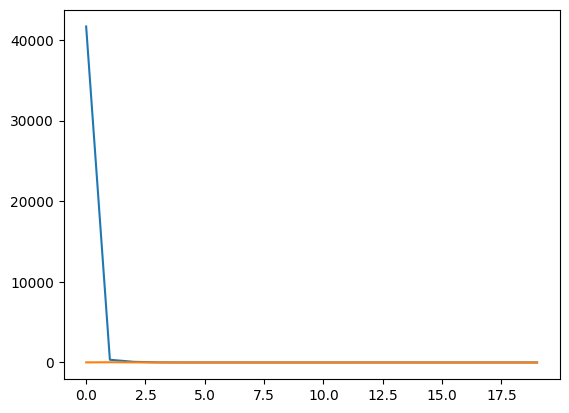

In [1590]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])